In [1]:
import pandas as pd
from datetime import datetime as dt

#read DataFrame from pickle file
df1= pd.read_pickle("raw_data_h0_xy.pkl")
df2= pd.read_pickle("data_h0.pkl")

list_sta = [col for col in df2]
mylst = [s.replace('_x', '') for s in list_sta]
mylst.remove('julian_day')
#print(len(mylst))
#print(mylst)

d={}
for i in range(280):
    kolom_sta = [j for j in df1 if j.startswith(mylst[i])]

    #print(kolom_sta)
    d[i] = pd.concat([df1['julian_day'],df1[kolom_sta]], axis=1)
    #print(d[i])



In [2]:
df = d[0]
f = lambda x: 1 if x>1 else 0
df['target'] = df.iloc[:,2].map(f)

df.isna().sum().sum()

from datetime import datetime as dt
df['julian_day'] = pd.to_datetime(df['julian_day'].str.strip(), format='%Y-%m-%d')
# Parse each date into its parts and store as a new column.
df['month'] = df['julian_day'].dt.month
#df['day'] = df['lpep_pickup_datetime'].dt.day
df['year'] = df['julian_day'].dt.year
df['fitur'] = df.iloc[:,1]
df



,julian_day,12050702a_x,12050702a_y,target,month,year,fitur
0,1998-01-01,11.149414,0.0,0,1,1998,11.149414
1,1998-01-04,8.740234,37.0,1,1,1998,8.740234
2,1998-01-08,9.798828,0.0,0,1,1998,9.798828
3,1998-01-11,12.183594,0.0,0,1,1998,12.183594
4,1998-01-15,1.404297,0.0,0,1,1998,1.404297
...,...,...,...,...,...,...,...
2095,2017-12-17,1.712891,0.0,0,12,2017,1.712891
2096,2017-12-20,1.857422,50.0,1,12,2017,1.857422
2097,2017-12-24,23.367188,0.0,0,12,2017,23.367188
2098,2017-12-27,7.903320,0.0,0,12,2017,7.903320


In [3]:
df = df.drop(df.columns[[0, 1, 2]], axis=1)  # df.columns is zero-based pd.Index
df

,target,month,year,fitur
0,0,1,1998,11.149414
1,1,1,1998,8.740234
2,0,1,1998,9.798828
3,0,1,1998,12.183594
4,0,1,1998,1.404297
...,...,...,...,...
2095,0,12,2017,1.712891
2096,1,12,2017,1.857422
2097,0,12,2017,23.367188
2098,0,12,2017,7.903320


In [4]:
train = df.iloc[:1995,:]
train = train.dropna()
test  = df.iloc[1995:,:]
test = test.dropna()



In [8]:
train

,target,month,year,fitur
0,0,1,1998,11.149414
1,1,1,1998,8.740234
2,0,1,1998,9.798828
3,0,1,1998,12.183594
4,0,1,1998,1.404297
...,...,...,...,...
1990,0,12,2016,10.228516
1991,0,12,2016,13.961914
1992,0,12,2016,38.078125
1993,0,12,2016,7.980469


# MACHINE LEARNING

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [10]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
	  AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

                      Classifier  Accuracy
0           KNeighborsClassifier  0.638095
0                            SVC  0.723810
0         DecisionTreeClassifier  0.685714
0         RandomForestClassifier  0.666667
0             AdaBoostClassifier  0.723810
0     GradientBoostingClassifier  0.704762
0                     GaussianNB  0.695238
0     LinearDiscriminantAnalysis  0.733333
0  QuadraticDiscriminantAnalysis  0.704762
0             LogisticRegression  0.742857


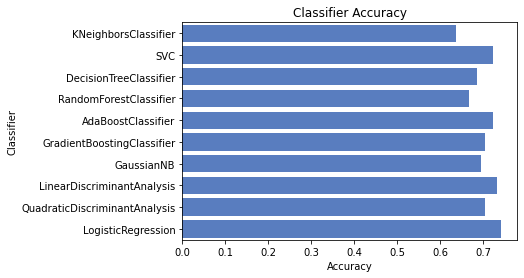

In [11]:
acc_dict = {}

# for train_index, test_index in sss.split(X, y):
X_train, X_test = train.iloc[:,1:], test.iloc[:,1:]
y_train, y_test = train.iloc[:,0], test.iloc[:,0]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
	
for clf in classifiers:
	name = clf.__class__.__name__
	clf.fit(X_train, y_train)
	train_predictions = clf.predict(X_test)
	acc = accuracy_score(y_test, train_predictions)
	if name in acc_dict:
		acc_dict[name] += acc
	else:
		acc_dict[name] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf]
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")
print(log)

In [12]:
log

,Classifier,Accuracy
0,KNeighborsClassifier,0.638095
0,SVC,0.723810
0,DecisionTreeClassifier,0.685714
0,RandomForestClassifier,0.666667
0,AdaBoostClassifier,0.723810
0,GradientBoostingClassifier,0.704762
0,GaussianNB,0.695238
0,LinearDiscriminantAnalysis,0.733333
0,QuadraticDiscriminantAnalysis,0.704762
0,LogisticRegression,0.742857
